## About the Dataset:
- The dataset has information about telecom customers, the dataset has info about both types of customers (ones who churn, ones who do not). 
- Each row represents a customer, and each column has particular features for each customer.
- The target variable for us is the **Churn** column, which tells us whether or not the customer has churned.
- Columns convey information about:
    1. Demographic information such as gender, age, whether or not they have dependents, and/or partners.
    2. Services each customer is using, such as phone, multiple lines, internet service, etc.
    3. Account information has data about the tenure of the customer, contract type, payment methods, monthly and total charges, etc.
- The dataset can be accessed through this link directing to Kaggle: [WA_Fn-UseC_-Telco-Customer-Churn](https://www.kaggle.com/datasets/palashfendarkar/wa-fnusec-telcocustomerchurn)

## Goal of the Analysis:
In this project, I will analyze customer churn data from a telecommunications company to uncover the key factors that contribute to customer attrition. Through detailed exploratory data analysis (EDA), I will examine customer demographics, service subscriptions, and account-related information to identify patterns and trends related to churn.

I will also create visualizations to better understand the distribution of variables and their relationships with churn behavior. Based on these insights, I will engineer relevant features and develop a predictive model using logistic regression to estimate the likelihood of future customer churn. 

The ultimate objective is to build a data-driven understanding that can help improve customer retention strategies.

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist as ed

## 2. EDA (Exploring the Dataset)

### 2.1 Reading the File and Examining Data

In [2]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
pd.set_option("display.max_columns", None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

### 2.2 Checking Datatypes of Columns

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
## It seems that TotalCharges column is in Text Datatype (object), converting it in float (numeric) type

data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### 2.3 Checking for Missing Values

In [7]:
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# There are only 11 missing values in TotalCharges column
# Since missing values comprises of rows less than 5% of the dataset, we can simply discard them.

data.dropna(inplace = True)
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.shape

(7032, 21)

## 3. Exploring Distributions of Individual Variables

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 3.1 Demographic Information

#### 3.1.1 Distributions of male and female in the dataset.

In [11]:
gender_dist = ed.Pmf.from_seq(data.gender, normalize = True)
gender_dist * 100

,probs
gender,
Female,49.530717
Male,50.469283


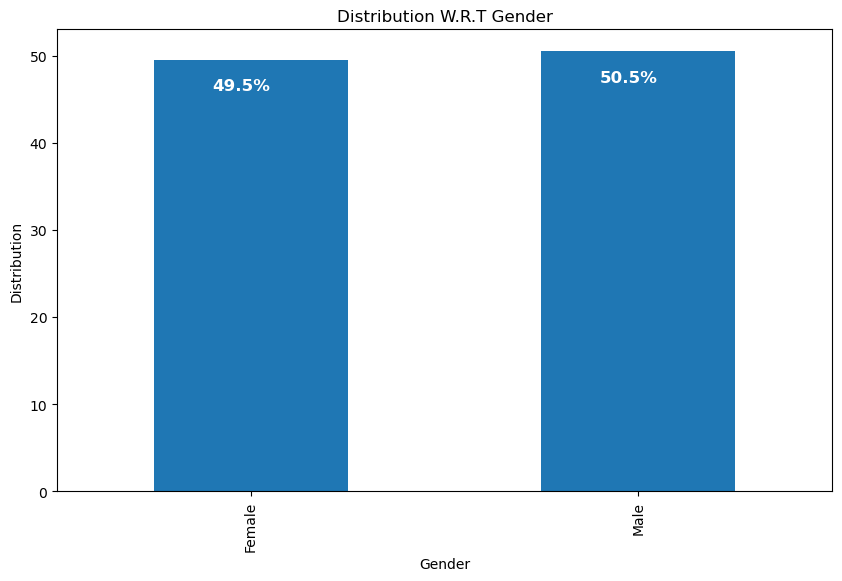

In [12]:
plt.figure(figsize = (10, 6))
plot = (gender_dist*100).plot(kind = 'bar')

plt.xlabel('Gender')
plt.ylabel('Distribution')
plt.title("Distribution W.R.T Gender")

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

plt.show();

The dataset has almost equal number of males and females.

#### 3.1.2 How many customers are senior citizens?

In [13]:
senior_dist = ed.Pmf.from_seq(data.SeniorCitizen, normalize = True)
senior_dist * 100

,probs
SeniorCitizen,
0,83.759954
1,16.240046


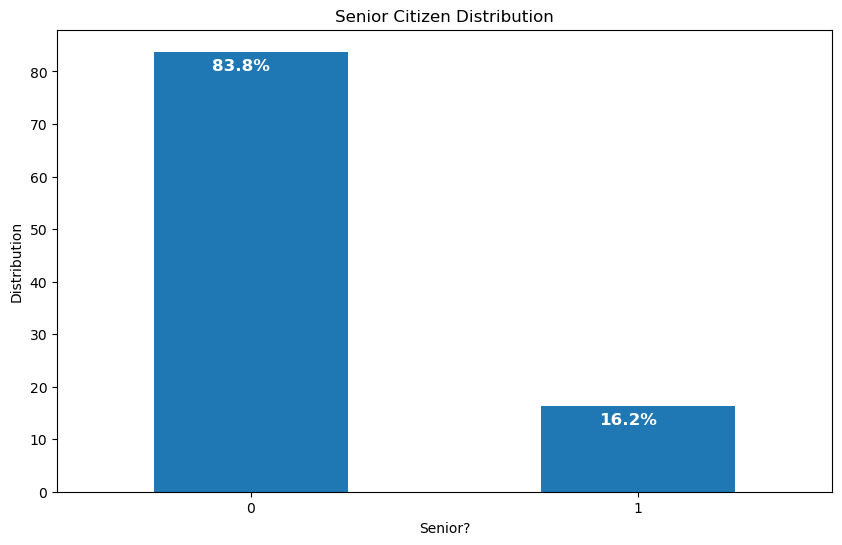

In [14]:
plt.figure(figsize = (10, 6))
plot = (senior_dist*100).plot(kind = 'bar')

plt.xlabel('Senior?')
plt.ylabel('Distribution')
plt.title("Senior Citizen Distribution")
plt.xticks(rotation = 0)

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

plt.show();

It looks like that the data has more young customers.

#### 3.1.3 Distribution of senior citiizens W.R.T gender.

In [15]:
male_data = data[data['gender'] == 'Male']
female_data = data[data['gender'] == 'Female']

male_seniors = ed.Pmf.from_seq(male_data.SeniorCitizen, normalize = True) * 100
female_seniors = ed.Pmf.from_seq(female_data.SeniorCitizen, normalize = True) * 100

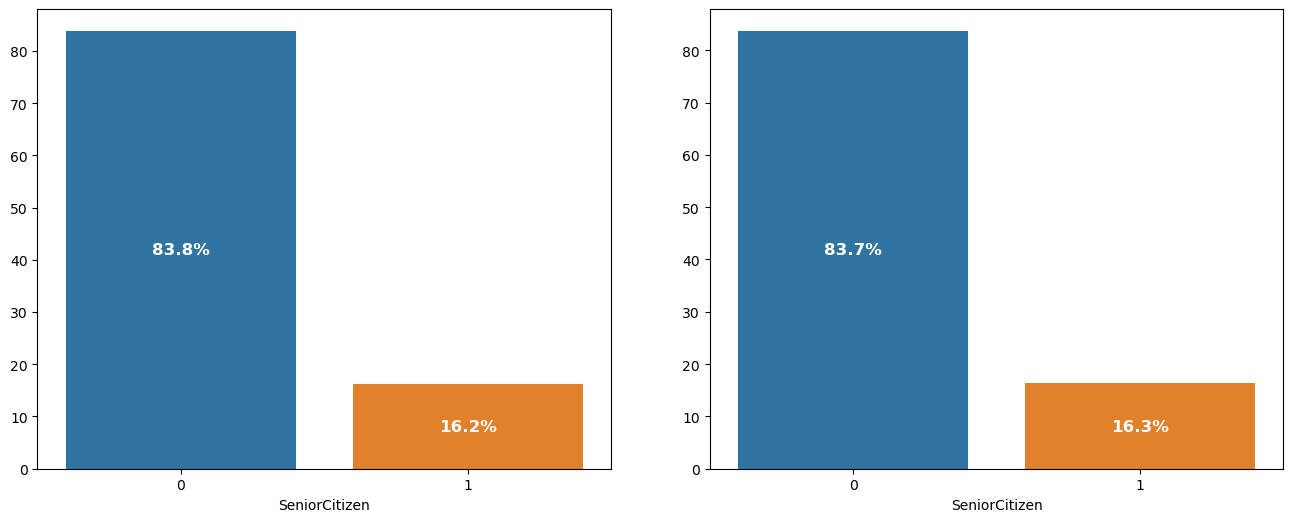

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
plt.tight_layout(pad = 4)

plot1 = sns.barplot(x = male_seniors.index, y = male_seniors.values, ax = axes[0])
plot2 = sns.barplot(x = female_seniors.index, y = female_seniors.values, ax = axes[1])


for p in plot1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot1.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')\
    
for p in plot2.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot2.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

After seeing the results, it can be easily concluded that the data has equal distribution gender-wise for Senior Citizen feature/variable.

#### 3.1.4 How many customers have partners?

In [17]:
partner_dist = ed.Pmf.from_seq(data.Partner, normalize = True)
partner_dist * 100

,probs
Partner,
No,51.749147
Yes,48.250853


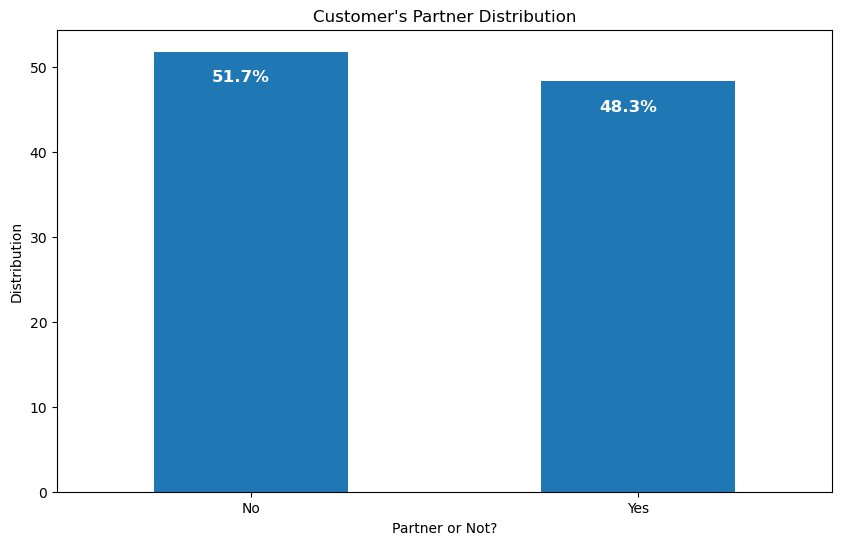

In [18]:
plt.figure(figsize = (10, 6))
plot = (partner_dist*100).plot(kind = 'bar')

plt.xlabel('Partner or Not?')
plt.ylabel('Distribution')
plt.title("Customer's Partner Distribution")
plt.xticks(rotation = 0)

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

plt.show();

The data has almost a 50-50 split between customers who have partners and those who do not.

#### 3.1.5 Distribution of partners W.R.T gender.

In [19]:
male_partner = ed.Pmf.from_seq(male_data.Partner, normalize = True) * 100
female_partner = ed.Pmf.from_seq(female_data.Partner, normalize = True)* 100

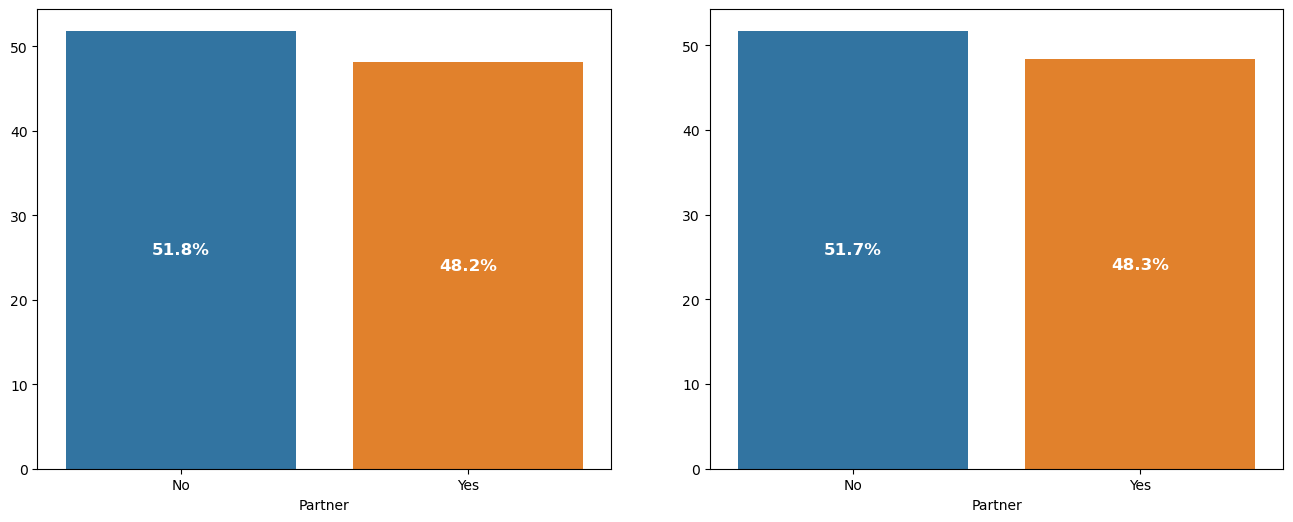

In [20]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
plt.tight_layout(pad = 4)

plot1 = sns.barplot(x = male_partner.index, y = male_partner.values, ax = axes[0])
plot2 = sns.barplot(x = female_partner.index, y = female_partner.values, ax = axes[1])


for p in plot1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot1.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')\
    
for p in plot2.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot2.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

There is equal distribution for Partner feature/variable gender-wise. The data has almost equal distributions/observations for Partner feature gender-wise.

#### 3.1.6 How many customers have people dependent on them?

In [21]:
dependent_dist = ed.Pmf.from_seq(data.Dependents, normalize = True)
dependent_dist * 100

,probs
Dependents,
No,70.150739
Yes,29.849261


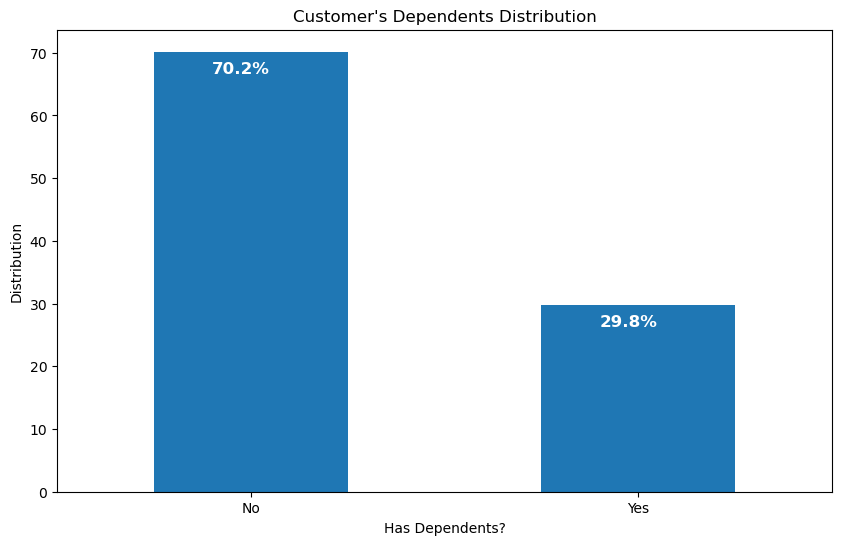

In [22]:
plt.figure(figsize = (10, 6))
plot = (dependent_dist*100).plot(kind = 'bar')

plt.xlabel('Has Dependents?')
plt.ylabel('Distribution')
plt.title("Customer's Dependents Distribution")
plt.xticks(rotation = 0)

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

plt.show();

It looks like many of the customers didnt have any dependents. About 70% of them!

#### 3.1.7 Distribution of dependents W.R.T gender.

In [23]:
male_dependents = ed.Pmf.from_seq(male_data.Dependents, normalize = True) * 100
female_dependents = ed.Pmf.from_seq(female_data.Dependents, normalize = True) * 100

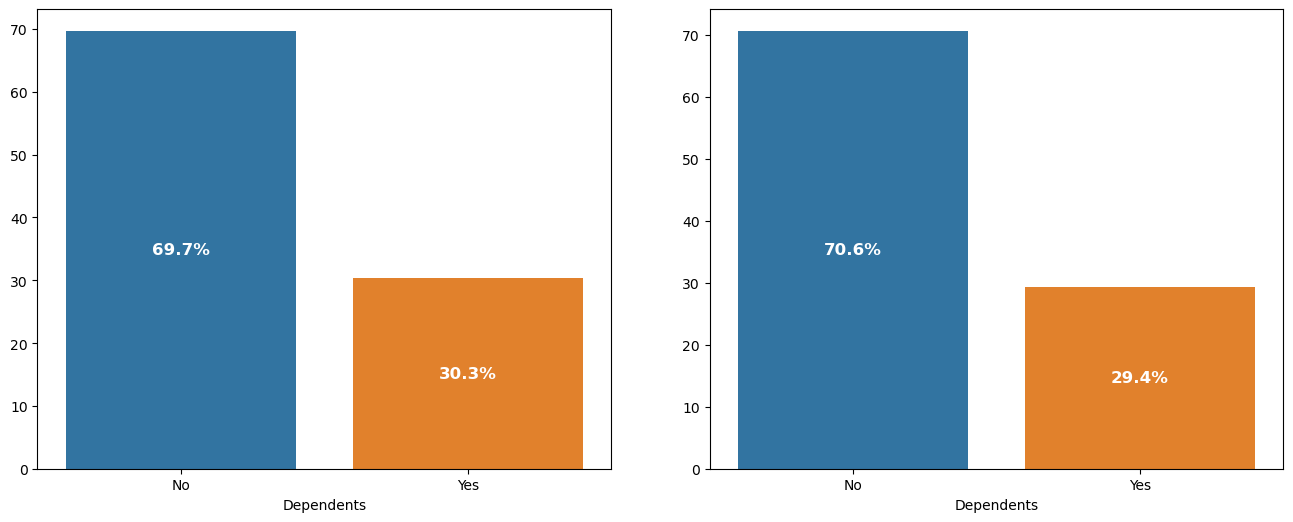

In [24]:
fig, axes = plt.subplots(1, 2, figsize = (14, 6))
plt.tight_layout(pad = 4)

plot1 = sns.barplot(x = male_dependents .index, y = male_dependents .values, ax = axes[0])
plot2 = sns.barplot(x = female_dependents .index, y = female_dependents .values, ax = axes[1])


for p in plot1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot1.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
for p in plot2.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot2.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

Yet again! There is equal distribution for Dependent feature/variable gender-wise.

#### 3.1.8 Distribution of customers W.R.T partners and dependents.

In [25]:
partner_dependent = data.groupby(['Dependents', 'Partner'])['customerID'].count().unstack()
partner_dependent

Partner,No,Yes
Dependents,,
No,3280,1653
Yes,359,1740


In [26]:
# converting into percentages

partner_dependent = (partner_dependent * 100) / (partner_dependent.sum())
partner_dependent

Partner,No,Yes
Dependents,,
No,90.134652,48.717949
Yes,9.865348,51.282051


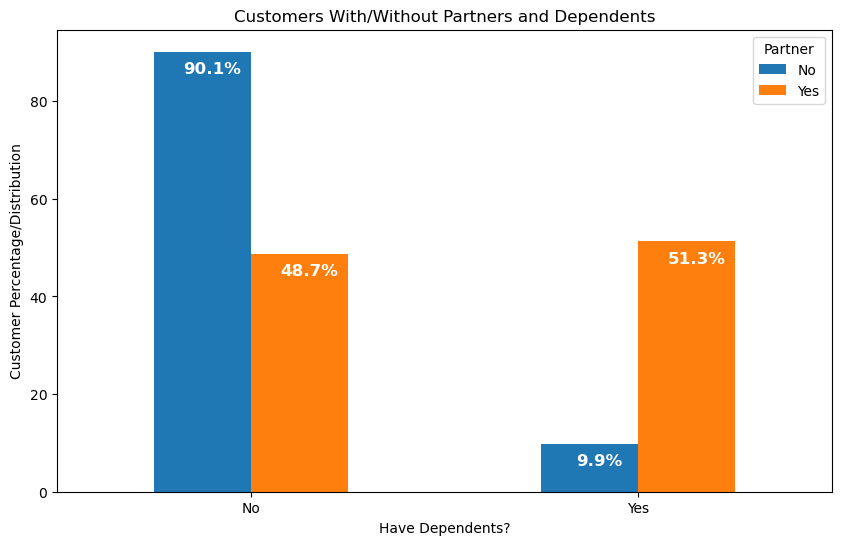

In [27]:
plot = partner_dependent.plot(kind = 'bar', figsize = (10, 6), align = 'center')

plt.xlabel('Have Dependents?')
plt.ylabel('Customer Percentage/Distribution')
plt.title("Customers With/Without Partners and Dependents")
plt.xticks(rotation = 0)

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold', ha = 'center', va = 'center')

plt.show();

So, the graph shows us that the customers which have or dont have dependents have almost the same distributions w.r.t having a partner.

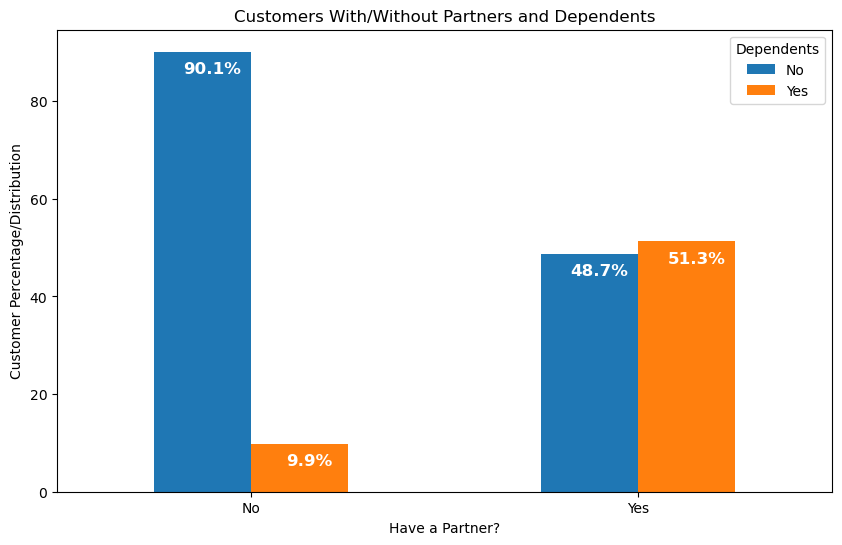

In [28]:
## Another representation of the same graph can be: we look at depenendents w.r.t customers have partner or not!

plot = partner_dependent.T.plot(kind = 'bar', figsize = (10, 6), align = 'center')

plt.xlabel('Have a Partner?')
plt.ylabel('Customer Percentage/Distribution')
plt.title("Customers With/Without Partners and Dependents")
plt.xticks(rotation = 0)

# Annotating the plot
patches = []
for i in plot.patches:
    patches.append(i.get_width())
    
patches = sum(patches)

for i in plot.patches:
    plot.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/patches), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold', ha = 'center', va = 'center')

plt.show();

This graph shows that customerrs who have partners have almost the same distribution of having or not having dependents.
But one interesting observation is that, customers not having a partner mostly dont have dependents!

### 3.2 Services Used by Customers

#### 3.2.1 Finding all services used by customers.

In [29]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
# There are 9 different services used by customer

services_list = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',\
                'TechSupport', 'StreamingTV', 'StreamingMovies']

#### 3.2.2 Getting the distributions for all in percentage.

In [31]:
dist_list = []
for service in (services_list):
    result_dist = ed.Pmf.from_seq(data[service], normalize = True)*100
    dist_list.append(result_dist)

In [32]:
print('-'*100)
for i, service in enumerate(services_list):
    print(f'\t\t\tService Name: {service} \n\nDistributions: {dist_list[i]}')
    print('-'*100)
    print()

----------------------------------------------------------------------------------------------------
			Service Name: PhoneService 

Distributions: PhoneService
No      9.67008
Yes    90.32992
Name: , dtype: float64
----------------------------------------------------------------------------------------------------

			Service Name: MultipleLines 

Distributions: MultipleLines
No                  48.137088
No phone service     9.670080
Yes                 42.192833
Name: , dtype: float64
----------------------------------------------------------------------------------------------------

			Service Name: InternetService 

Distributions: InternetService
DSL            34.357224
Fiber optic    44.027304
No             21.615472
Name: , dtype: float64
----------------------------------------------------------------------------------------------------

			Service Name: OnlineSecurity 

Distributions: OnlineSecurity
No                     49.729807
No internet service    21.615472
Yes      

#### 3.2.3 Plotting all the services in a grid for easy comparison.

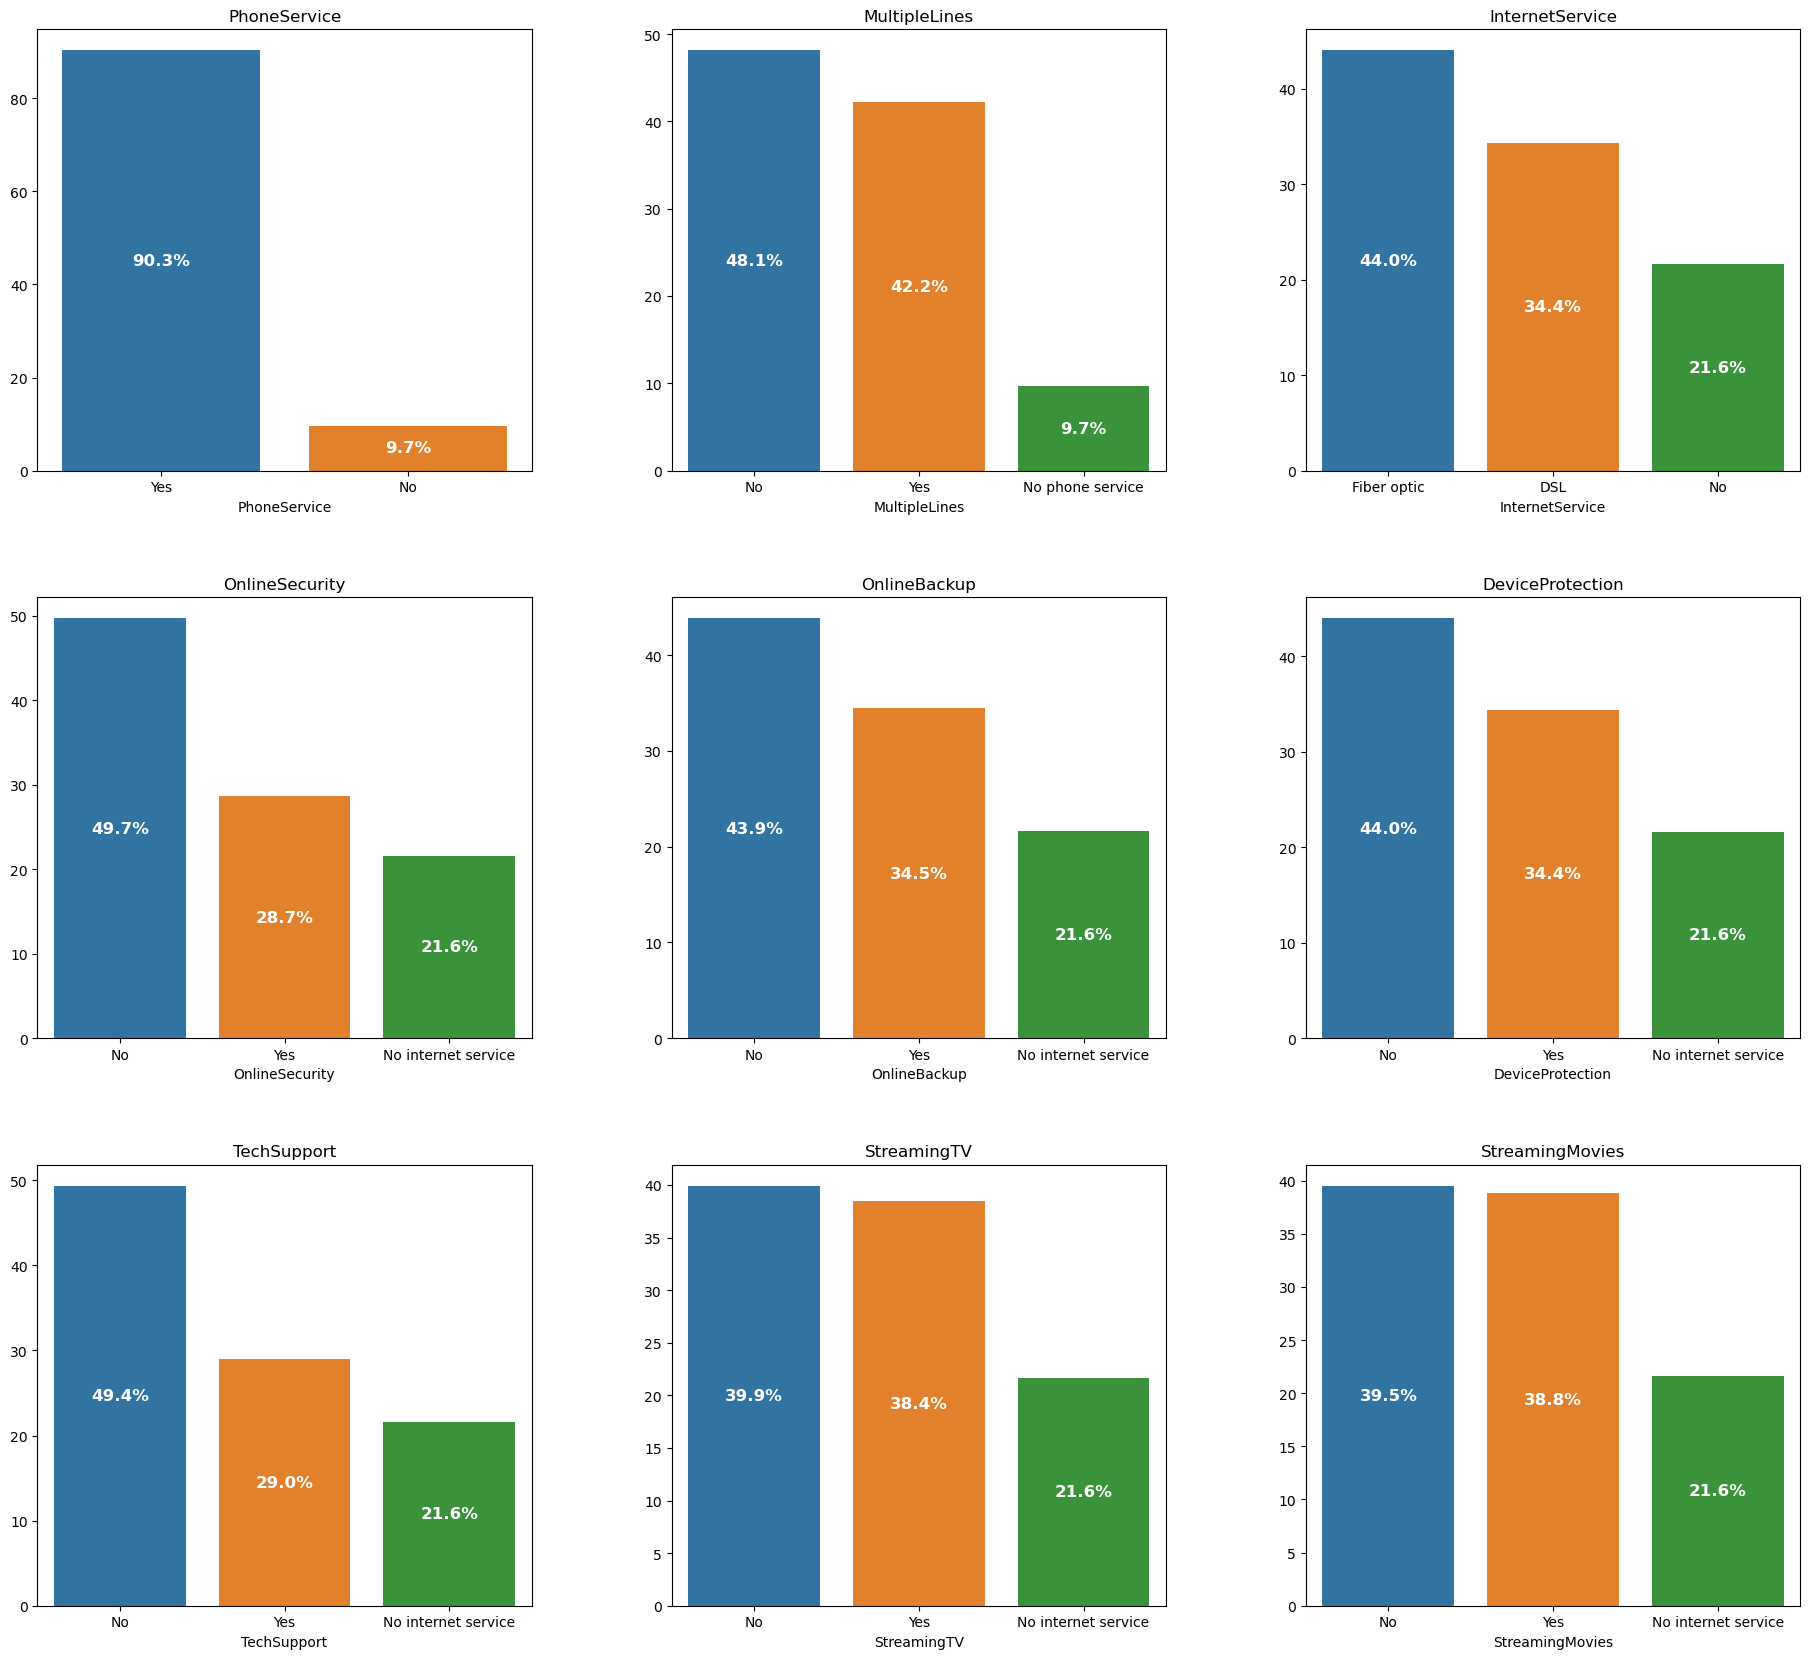

In [33]:
fig, axes = plt.subplots(3, 3, figsize = (20, 18))
plt.tight_layout(pad = 7)

for p in plot1.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot1.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
for i, dist in enumerate(dist_list[0: 3]):
    dist = dist.sort_values(ascending = False)
    plot = sns.barplot(x = dist.index, y = dist.values, ax = axes[0, i])
    axes[0, i].set_title(services_list[i])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = (p.get_x() + p.get_width() / 2) 
        y = p.get_y() + p.get_height() / 2
        plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
for i, dist in enumerate(dist_list[3: 6]):
    dist = dist.sort_values(ascending = False)
    plot = sns.barplot(x = dist.index, y = dist.values, ax = axes[1, i])
    axes[1, i].set_title(services_list[i+3])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = (p.get_x() + p.get_width() / 2) 
        y = p.get_y() + p.get_height() / 2
        plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

for i, dist in enumerate(dist_list[6: ]):
    dist = dist.sort_values(ascending = False)
    plot = sns.barplot(x = dist.index, y = dist.values, ax = axes[2, i])
    axes[2, i].set_title(services_list[i+3+3])
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = (p.get_x() + p.get_width() / 2) 
        y = p.get_y() + p.get_height() / 2
        plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

#### 3.2.4 Observations:

- Phone Service = most of the people have phone service, about 90% from this data.
- Multiple Lines = almost 50% of the the data has multiple lines and about 40% doesnt, while the remaining 10% dont have any phone service.
- Internet Service = 20% of the customers dont have any internet service! While the rest have either DSL or Fiber Optic.
- Online Security = about 30% of the customers have online security, while the rest dont.
- Online Backup = about 35% of the customers have online backups services while the rest dont.
- Device Protection = again, about 35% of the customers have device protection, while the rest dont.
- Tech Support = only 30% of the customers have tech support services, while the rest dont.
- Streaming TV = about 38% have this service.
- Streaming Movies = lastly, about 39% customers have this service.

These distributions would become more important and interesting as we will see their relationship with out target variable i.e., Churn! It'd be interesting to know whether or not having these services result in more customer churn rate or not, but for now, we now know the distribution of the data in terms of these services.

### 3.3 Account Information 

In [34]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### 3.3.1 Exploring tenure distribution.

In [35]:
min_value = data['tenure'].min()
max_value = data['tenure'].max()

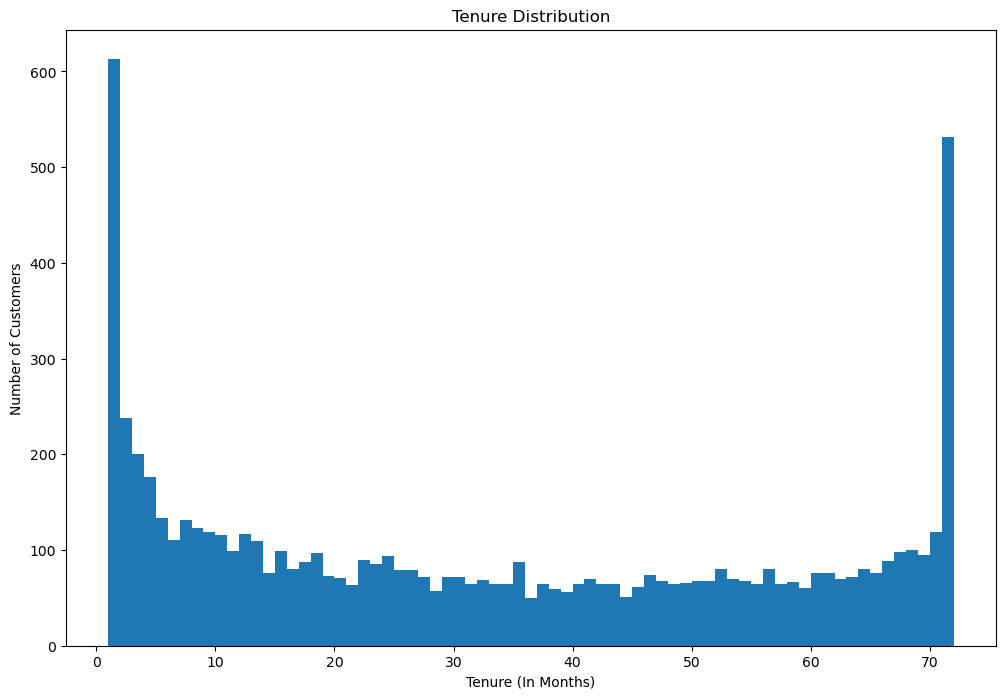

In [36]:
tenure = data['tenure']
bin_range = np.arange(min_value, max_value + 1)

plt.figure(figsize = (12, 8))
plt.hist(tenure, bins = bin_range)

plt.title('Tenure Distribution')
plt.xlabel("Tenure (In Months)")
plt.ylabel('Number of Customers')
plt.show();

It looks like most of the customers stay in the company for just a month or two. Also, there is also a great number of customers who stay in the company for around 72-73 months.

#### 3.3.2 Examining contract distribution.
We can also know more about customers who stay for just a month or for a long period of time by examining what kind of contracts they have from the company.

In [37]:
contract_dist = ed.Pmf.from_seq(data.Contract, normalize = True)*100

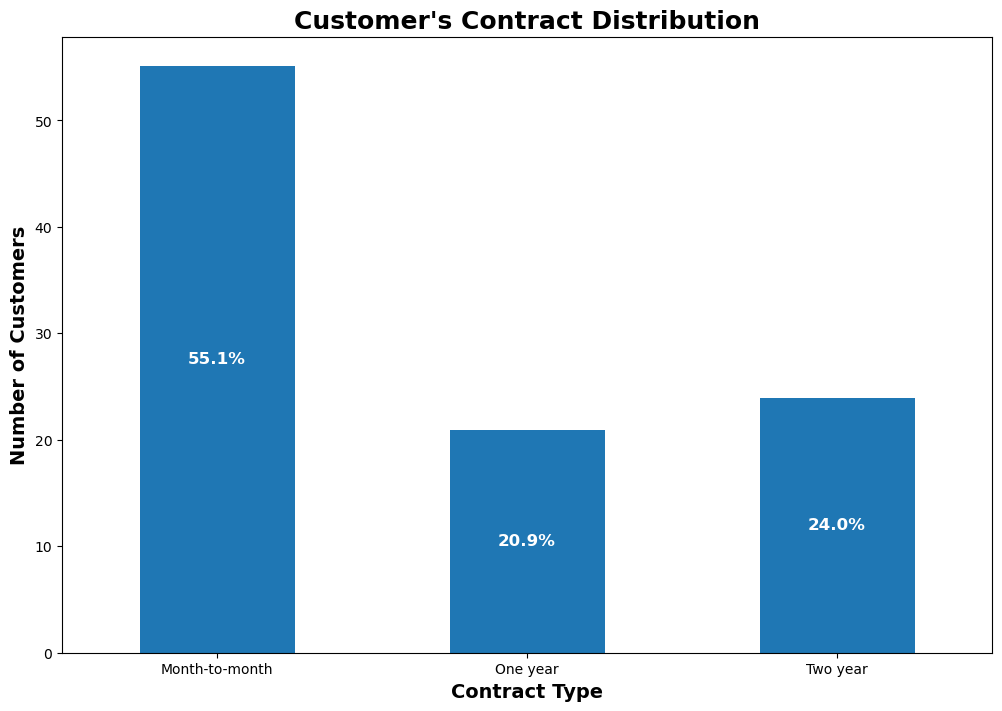

In [38]:
plt.figure(figsize = (12, 8))
plot = contract_dist.plot(kind = 'bar')

plt.xticks(rotation = 0)
plt.title("Customer's Contract Distribution", weight = 'bold', size = 18)
plt.xlabel("Contract Type", weight = 'bold', size = 14)
plt.ylabel("Number of Customers", weight = 'bold', size = 14)

# Annotating the plot
for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

plt.show();

More than 50% of the customers have been in the company in a month-to-month contract. No wonder many of the customer's tenure is of 1 or 2 months!

#### 3.3.3 Examining tenure of customers contract-wise.

In [39]:
tenure_month = data[data['Contract'] == 'Month-to-month']['tenure']
tenure_1year = data[data['Contract'] == 'One year']['tenure']
tenure_2year = data[data['Contract'] == 'Two year']['tenure']

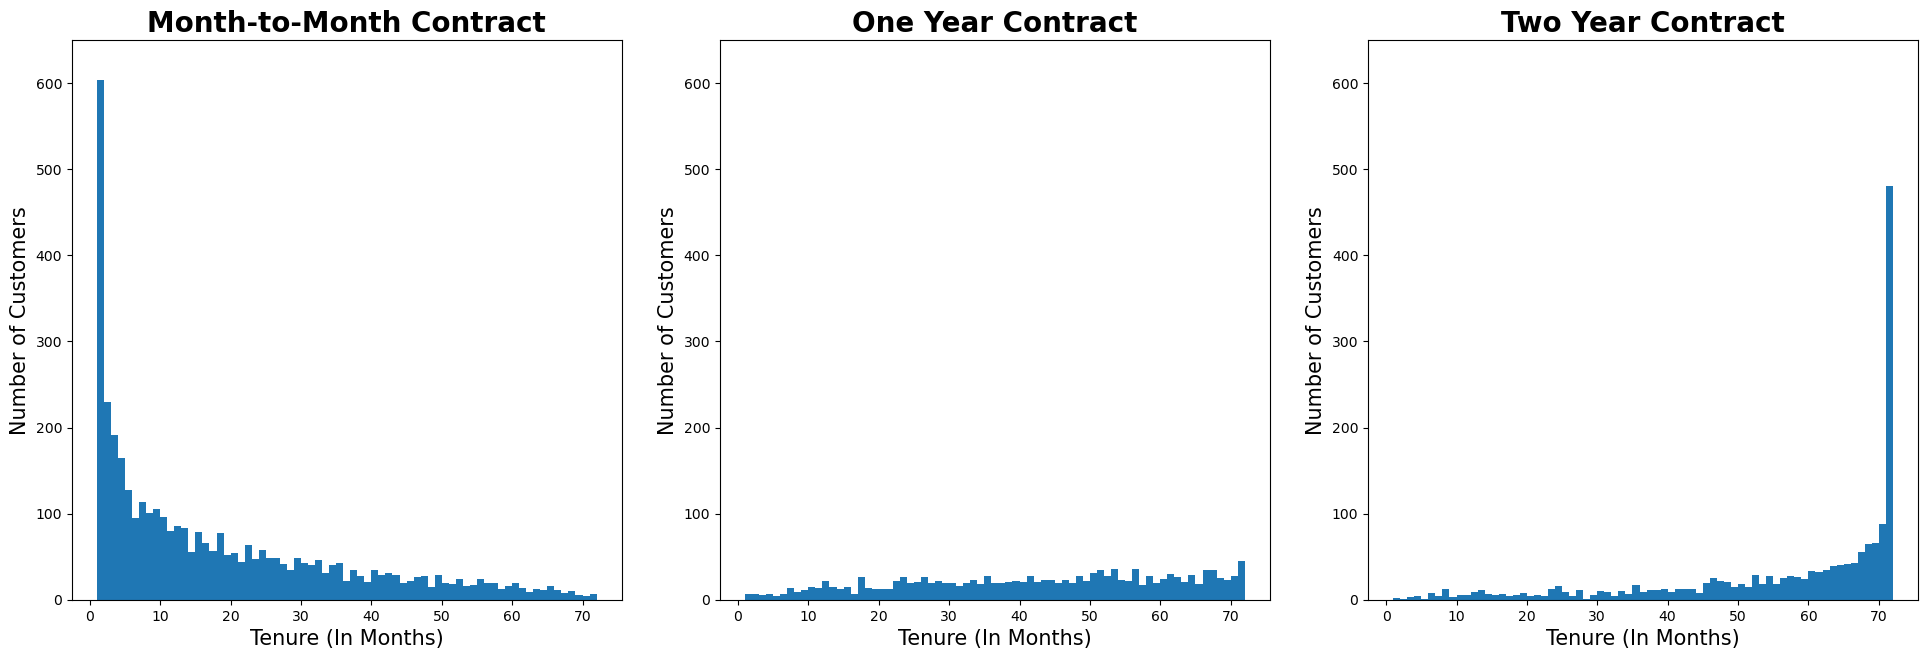

In [40]:
fig, axes = plt.subplots(1, 3, figsize = (20, 7))
plt.tight_layout(pad = 4)

axes[0].hist(tenure_month, bins = bin_range)
axes[1].hist(tenure_1year, bins = bin_range)
axes[2].hist(tenure_2year, bins = bin_range)

# setting same range for y-axis for all the graphs
axes[0].set_ylim(0, 650)
axes[1].set_ylim(0, 650)
axes[2].set_ylim(0, 650)

# labelling each graph
axes[0].set_title('Month-to-Month Contract', size = 20, weight = 'bold')
axes[1].set_title('One Year Contract', size = 20, weight = 'bold')
axes[2].set_title('Two Year Contract', size = 20, weight = 'bold')

axes[0].set_xlabel('Tenure (In Months)', size = 15)
axes[1].set_xlabel('Tenure (In Months)', size = 15)
axes[2].set_xlabel('Tenure (In Months)', size = 15)

axes[0].set_ylabel('Number of Customers', size = 15)
axes[1].set_ylabel('Number of Customers', size = 15)
axes[2].set_ylabel('Number of Customers', size = 15)

plt.show();

- As expected, most of the customers have month-to-month contract and many of those customers seem to leave the company within 1 or 2 months. Month-to-month customers have the shortest tenure!
- While for those having 1-year contract, their tenure seems to be of different values.
- And for customers with 2-year contract, they tend to be the most loyal to the company, up to 72-73 months. 2-year customers have the longest tenure!

#### 3.3.4 Distribution of payment methods of customers.

In [41]:
payment_dist = ed.Pmf.from_seq(data.PaymentMethod, normalize = True)*100

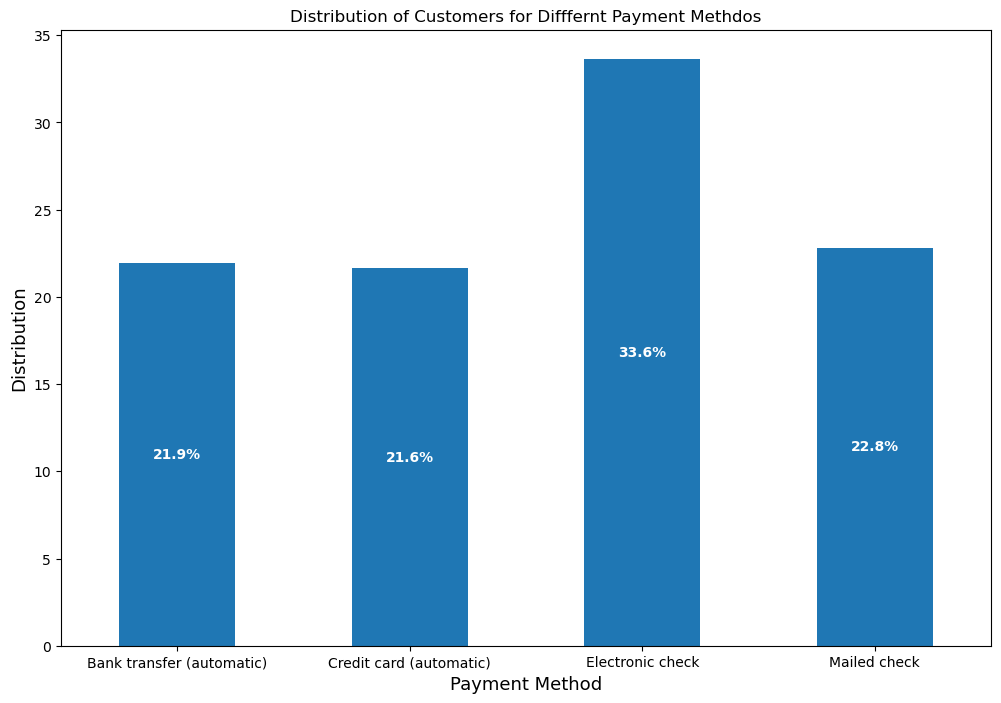

In [42]:
plot = payment_dist.plot(kind = 'bar', figsize = (12, 8))

plt.xticks(rotation = 0)
plt.xlabel('Payment Method', size = 13)
plt.ylabel('Distribution', size = 13)
plt.title('Distribution of Customers for Difffernt Payment Methdos')

for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 10, color = 'white', weight = 'bold', va = 'center', ha = 'center')

There is not much depth to this distribution, as it appears that the distribution of customers w.r.t payment methods is almost equal.

#### 3.3.5 Relationship between monthly and total charges of customers.

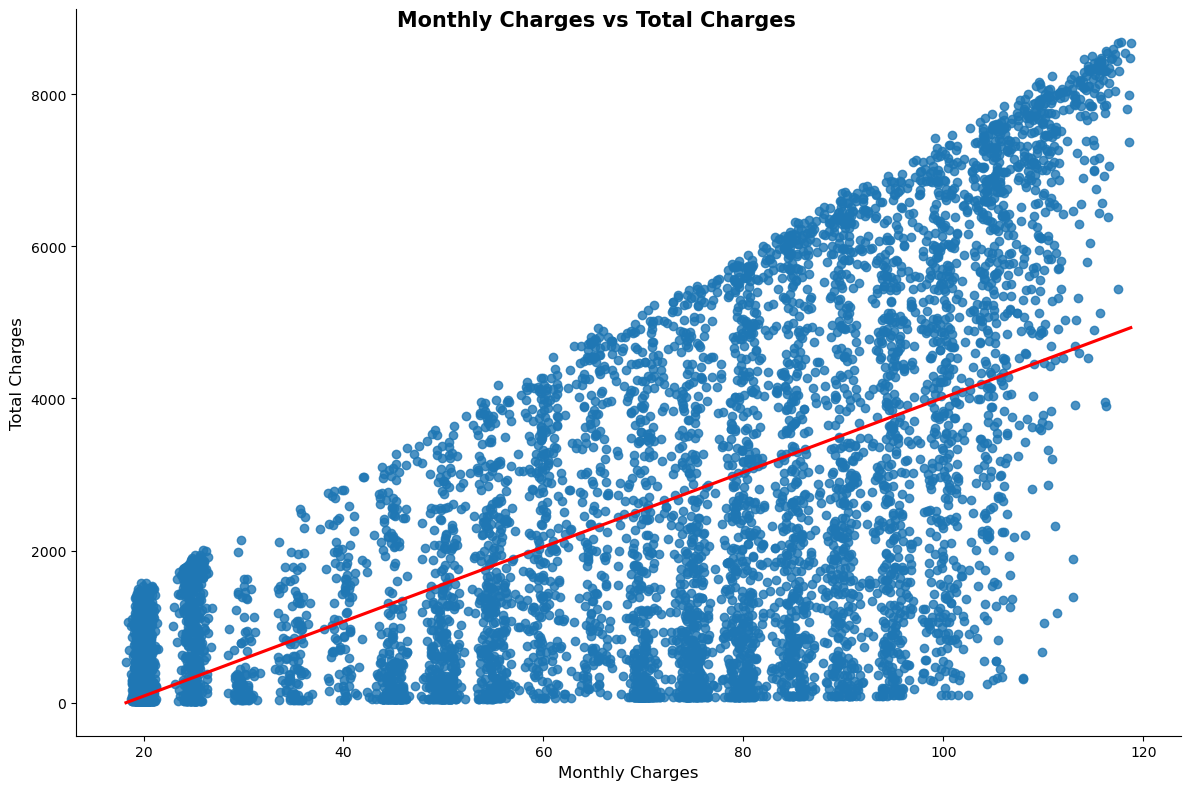

In [43]:
plot = sns.lmplot(x = 'MonthlyCharges', y = 'TotalCharges', data = data, ci = None, height = 8, aspect = 1.5,\
                  line_kws={'color': 'red'})

plot.fig.suptitle('Monthly Charges vs Total Charges', size = 15, weight = 'bold')
plot.set_axis_labels('Monthly Charges', 'Total Charges', size = 12)

As monthly charges of the customers increase, the total charges increases too! There is a positive slope between the two variables.

### 3.4 Exlporing Target Variable (Churn)

In [44]:
churn_dist = ed.Pmf.from_seq(data.Churn, normalize = True) * 100

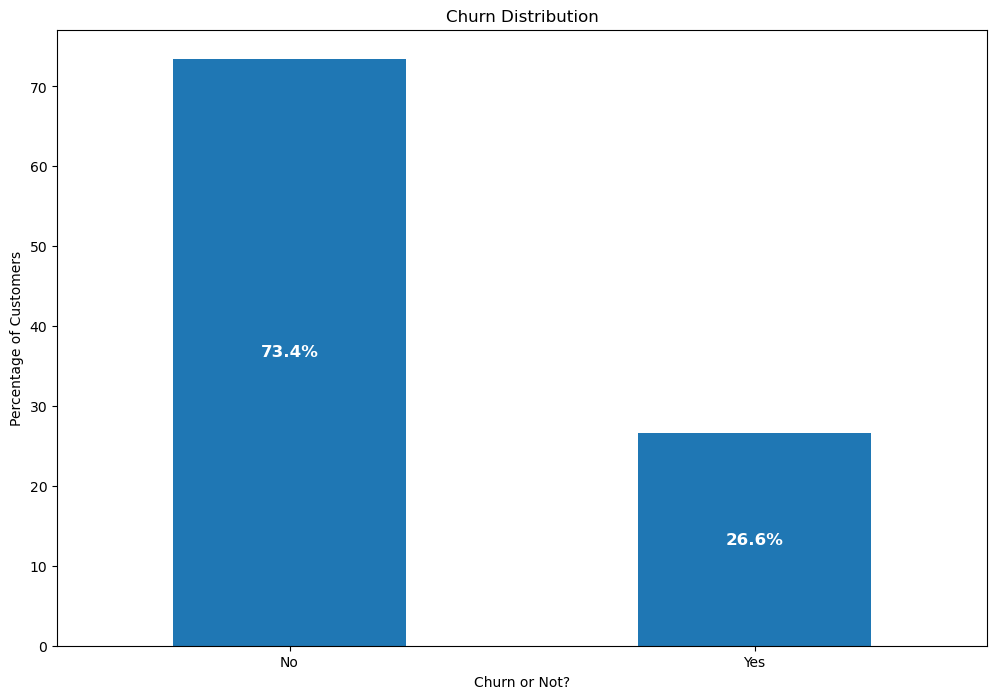

In [45]:
plt.figure(figsize = (12, 8))
plot = churn_dist.plot(kind = 'bar')

for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')

plt.title('Churn Distribution')
plt.xlabel('Churn or Not?')
plt.ylabel("Percentage of Customers")
plt.xticks(rotation = 0)

plt.show();

Ok wow! There are a lot of customers that dont churn, about 73% of them! It shows that our dataset has class imbalance, i.e., one class is more frequent than the other.
This can cause difference in results when I will begin modelling useing different techniques. I can either increase the weight of the infrequent class or I can use different performance metrics to get good results!
Accuracy alone will not be sufficient for this data!

### 3.5 Final Observations/Insights (Compiled)

#### 3.5.1 Demographic information:

1. Gender = there is no such distribution or skewness based on gender.
2. Senior Citizen = there is skewness here, as about 83% of the data has young customers. However, there is an equal distribution of males and females in this.
3. Partners = there is almost a 50-50 split distribution in this. And there is equal distribution gender-wise.
4. Dependents = about 70% of the customers dont have any dependents. And there is equal distribution gender-wise.
5. Dependents + Partner = customers who have partners have an equal distribution of having dependents or not. However, customers who don't have any partners mostly don't have dependents.

#### 3.5.2 Services used by customers:
1. Phone Service = most people have phone service, about 90% from this data.
2. Multiple Lines = almost 50% of the data has multiple lines, about 40% doesn't, and the remaining 10% has no phone service.
3. Internet Service = 20% of the customers don't have any internet service! While the rest have either DSL or Fiber Optic.
4. Online Security = about 30% of the customers have online security, while the rest don't.
5. Online Backup = about 35% of the customers have online backup services, while the rest don't.
6. Device Protection = again, about 35% of the customers have device protection, while the rest don't.
7. Tech Support = only 30% of the customers have tech support services, while the rest don't.
8. Streaming TV = about 38% have this service.
9. Streaming Movies = lastly, about 39% customers have this service.

#### 3.5.3 Account information:
1. Tenure = most of the customers stay for about 1 - 2 months, and there is also a great number of customers who stay for 72 - 73 months.
2. Contract = more than 50% of customers have Month-to-Month contracts, which also shows why many customers have tenure of just 1 or 2 months.
3. Tenure + Contract = most of the customers have month-to-month contracts, and that's why most of the customers leave within 1 - 2 months. While customers with having 2-year contract are the most loyal, they stay up to 72 - 73 months.
4. Payment Methods = there is an almost equal distribution here.
5. Monthly Charges and Total Charges = as monthly charges increase, the total charges also increase.

#### 3.5.4 Target variable:

- Churn = About 73% of the customers in this data do not churn; there is skewness and class imbalance.

## 4. Feature Engineering and Model Development

### 4.1 Feature Engineering
In this step of the analysis, I will use some techniques and visualizations to see relationship of our features (variables) with the target variable (Churn). At the end of this, I would have a list of features on which Churn variable depends on, such features would be the most suitable for developing models and predicting Churn rate for future customers.

#### 4.1.1 Finding correlation of churn with other variables.

In [46]:
data1 = data.copy()

In [47]:
# we first have to convert the categorical variables into numerical values

# converting target variable
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

data1['Churn'] = Le.fit_transform(data1.Churn)


# converting features into separate variables
dummies = pd.get_dummies(data1.drop(columns = 'customerID'))
dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,False,False,True,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False


In [48]:
# finding correlations

corr = dummies.corr()['Churn']
corr_pos = corr[corr >= 0] * 100
corr_neg = corr[corr < 0] * 100

corr_pos = corr_pos.sort_values(ascending = False)
corr_neg = corr_neg.sort_values(ascending = False) * -1

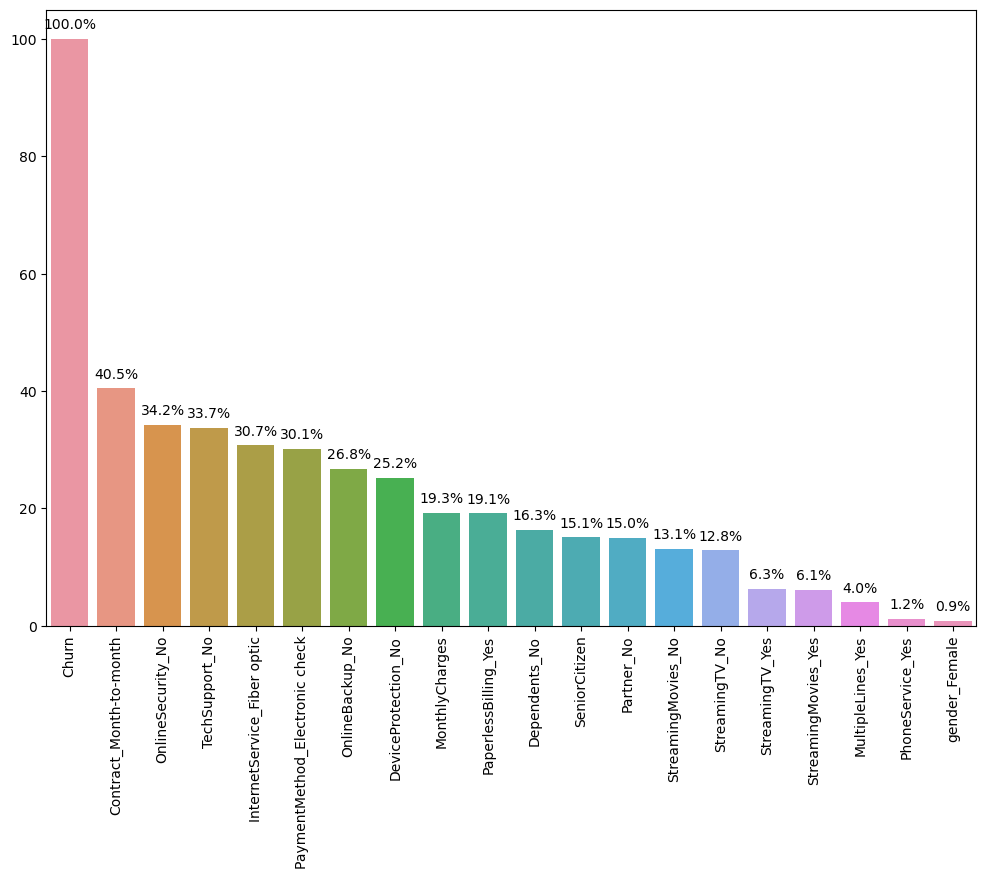

In [49]:
# visualizing positive and negative correlations
plt.figure(figsize = (12, 8))

plot = sns.barplot(x = corr_pos.index, y = corr_pos.values)

for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plot.annotate(percentage ,(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points')    

plt.xticks(rotation = 90)
plt.show()

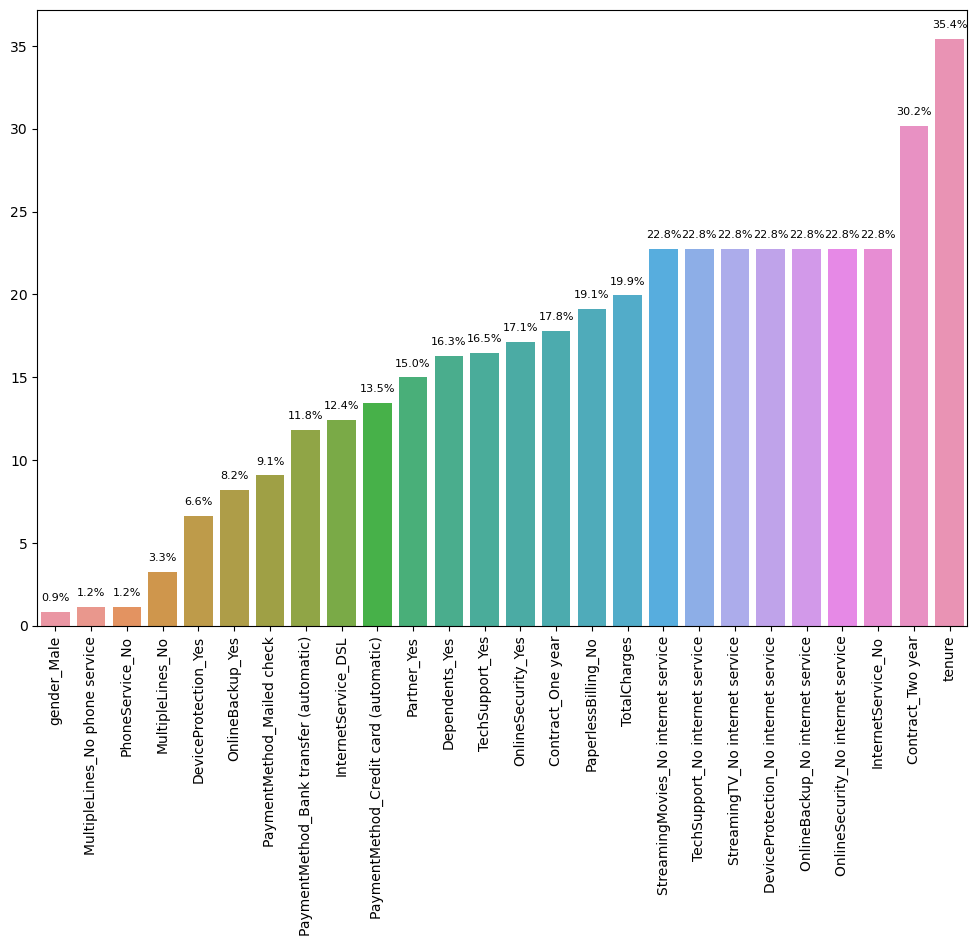

In [50]:
plt.figure(figsize = (12, 8))

plot = sns.barplot(x = corr_neg.index, y = corr_neg.values)

for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    plot.annotate(percentage ,(p.get_x()+p.get_width()/2., p.get_height()),ha='center', va='center', xytext=(0, 10), textcoords='offset points', size = 8)    

plt.xticks(rotation = 90)
plt.show()

##### Observations:

- Correlation only tells by how much two variables are related, to explore them futher, I will use different visualizations later.
- For now, correlation still made a few things pretty clear, like:
    1. There is no effect of gender on Churn rate.
    2. Having a phone service and multiple lines or not has no or negligible effect on Churn rate.
    3. There is a positive correlation of Churn with Month-to-month contracts, customers with no Online security, tech support, device protection, online backup.
    4. There is also a positive correlation of Churn with Senior customers, telling us that Senior customers are more likely to churn.
    5. There is a negative correlation of Churn with tenure, customers with 2-year contract, total charges.
    6. There is also interestingly a negative correlation of Churn with customers having no internet service.

#### 4.1.2 Churn rate vs contract.

In [51]:
# i will see how many customers churn based on what type of contract they have.

data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [52]:
contract_group = data1[data1['Churn'] == 1].groupby(['Contract'])['Churn'].count()
contract_group

Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64

In [53]:
# convert into percentages for better interpretation

contract_group = contract_group / len(data1[data1['Churn'] == 1]) * 100
contract_group

Contract
Month-to-month    88.550027
One year           8.881755
Two year           2.568218
Name: Churn, dtype: float64

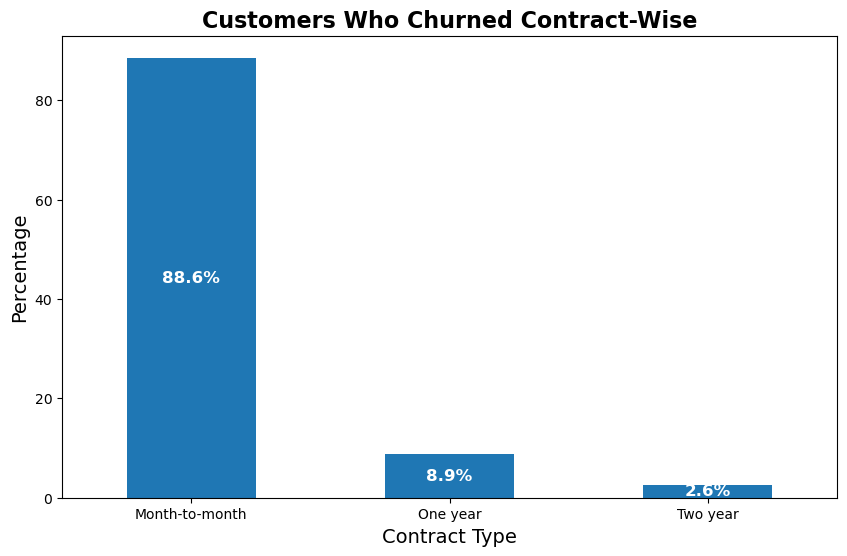

In [54]:
plt.figure(figsize = (10, 6))
plot = contract_group.plot(kind = 'bar')


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Contract Type', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Customers Who Churned Contract-Wise', size = 16, weight = 'bold')
plt.show();

It is confirmed what we learned from the correlation plots! The customers having month-to-month contracts churn the most. And the rest of the customers have lower churn rate comparatively.

In [55]:
# we can analyze it much deeper by seeing individual percentages of customers who churned and those who didn't

contract_group1 = data1.groupby(['Churn', 'Contract']).size().unstack()

In [56]:
# converting into percentages

contract_group1 = contract_group1 / contract_group1.sum() * 100

In [57]:
contract_group1

Contract,Month-to-month,One year,Two year
Churn,,,
0,57.290323,88.722826,97.151335
1,42.709677,11.277174,2.848665


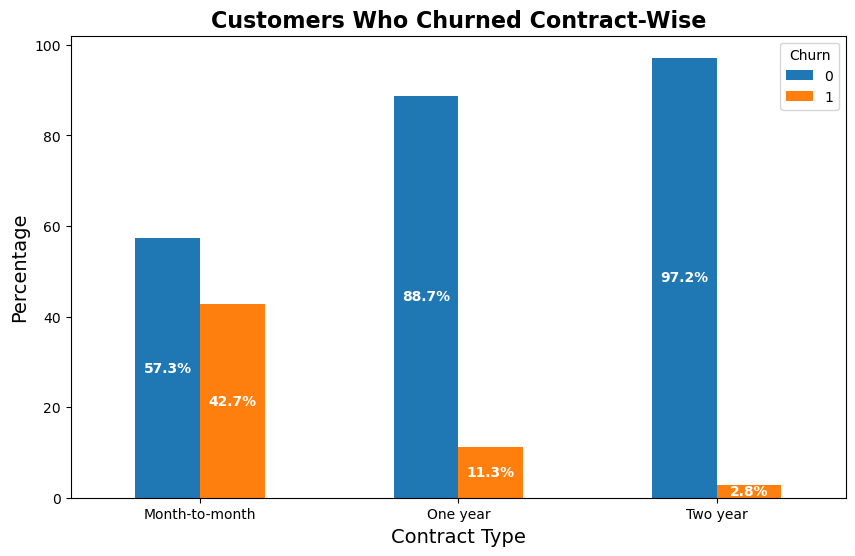

In [58]:
plot = contract_group1.T.plot(kind = 'bar', figsize = (10, 6))


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 10, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Contract Type', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Customers Who Churned Contract-Wise', size = 16, weight = 'bold')
plt.show();

Again it is easily proved what was stated above.

#### 4.1.3 Churn rate vs senior citizen.

In [59]:
senior_group = data1[data1['Churn'] == 1].groupby(['SeniorCitizen'])['Churn'].count()
senior_group

SeniorCitizen
0    1393
1     476
Name: Churn, dtype: int64

In [60]:
# convert into percentages for better interpretation

senior_group = senior_group / len(data1[data1['Churn'] == 1]) * 100
senior_group

SeniorCitizen
0    74.531835
1    25.468165
Name: Churn, dtype: float64

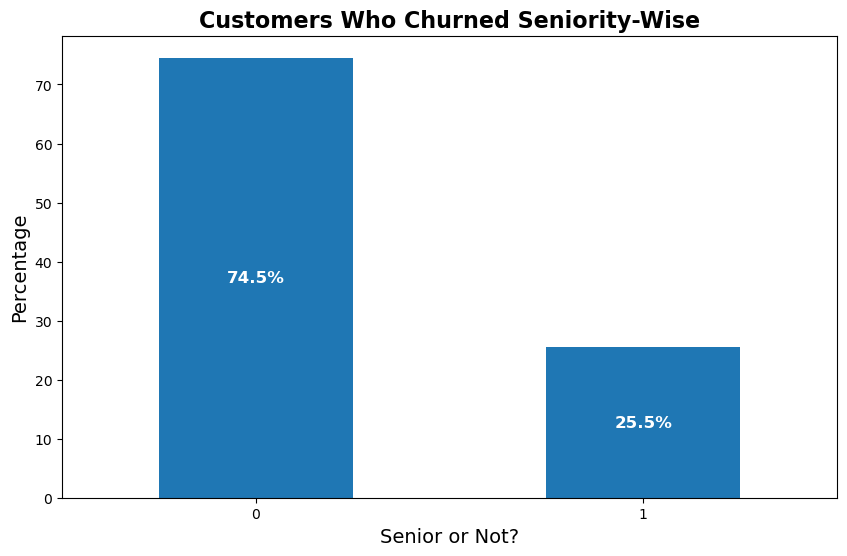

In [61]:
plt.figure(figsize = (10, 6))
plot = senior_group.plot(kind = 'bar')


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Senior or Not?', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Customers Who Churned Seniority-Wise', size = 16, weight = 'bold')
plt.show();

Hmm, it looks like young people churn more than the seniors, which is quite odd. Well, this is because our dataset has more distributions for young customers (as explored in EDA), and because of that, we are getting unusual results. Let's try another technique.

In [62]:
senior_group1 = data1.groupby(['Churn', 'SeniorCitizen']).size().unstack()
senior_group1

SeniorCitizen,0,1
Churn,,
0,4497,666
1,1393,476


In [63]:
senior_group1 = senior_group1 / senior_group1.sum() * 100
senior_group1

SeniorCitizen,0,1
Churn,,
0,76.349745,58.318739
1,23.650255,41.681261


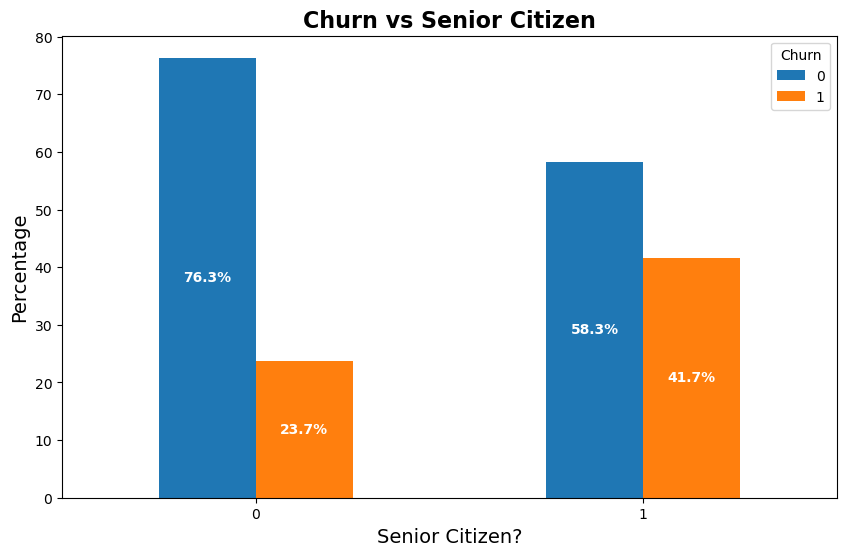

In [64]:
plot = senior_group1.T.plot(kind = 'bar', figsize = (10, 6))


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 10, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Senior Citizen?', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Churn vs Senior Citizen', size = 16, weight = 'bold')
plt.show();

Voila! We saw in the correlation graph also that senior customers tend to churn more than young ones, and this is again another visualization of the same statement i.e., Senior Citizens are positively related with Churn Rate.

#### 4.1.4 Churn rate vs tenure.

In [65]:
tenure_churn = data1.groupby('Churn')['tenure'].size() / len(data1) * 100
tenure_churn

Churn
0    73.421502
1    26.578498
Name: tenure, dtype: float64

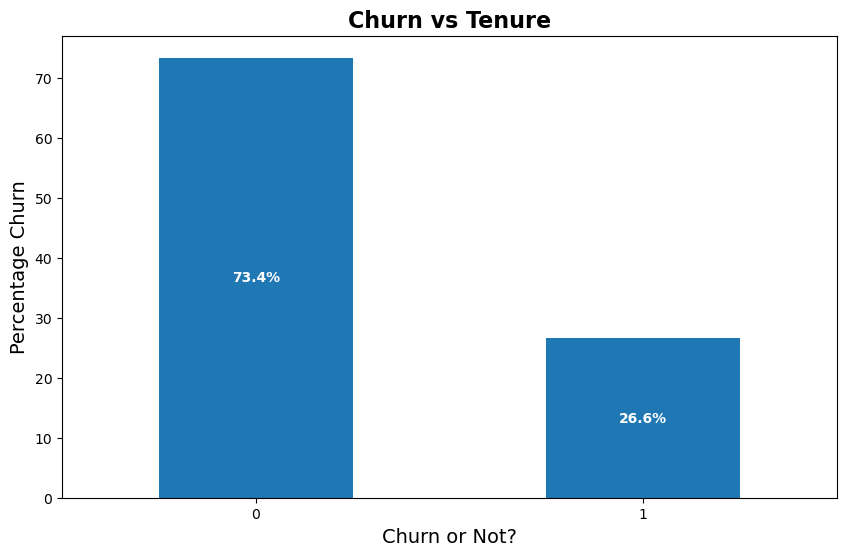

In [66]:
plt.figure(figsize = (10, 6))
plot = tenure_churn.plot(kind = 'bar')



for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 10, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Churn or Not?', size = 14)
plt.ylabel('Percentage Churn', size = 14)
plt.title('Churn vs Tenure', size = 16, weight = 'bold')
plt.show();

We saw this too in the correlation graph, that as tenure increases, customers are not likely to churn. While customers with less tenure (such as 1 - 2 months) churn the most. Loyal customers with longer tenure dont churn often.

#### 4.1.5 Churn rate vs internet service.

In [67]:
internet_group = data1[data1['Churn'] == 1].groupby(['InternetService'])['Churn'].count()
internet_group

InternetService
DSL             459
Fiber optic    1297
No              113
Name: Churn, dtype: int64

In [68]:
# convert into percentages for better interpretation

internet_group = internet_group / len(data1[data1['Churn'] == 1]) * 100
internet_group

InternetService
DSL            24.558587
Fiber optic    69.395399
No              6.046014
Name: Churn, dtype: float64

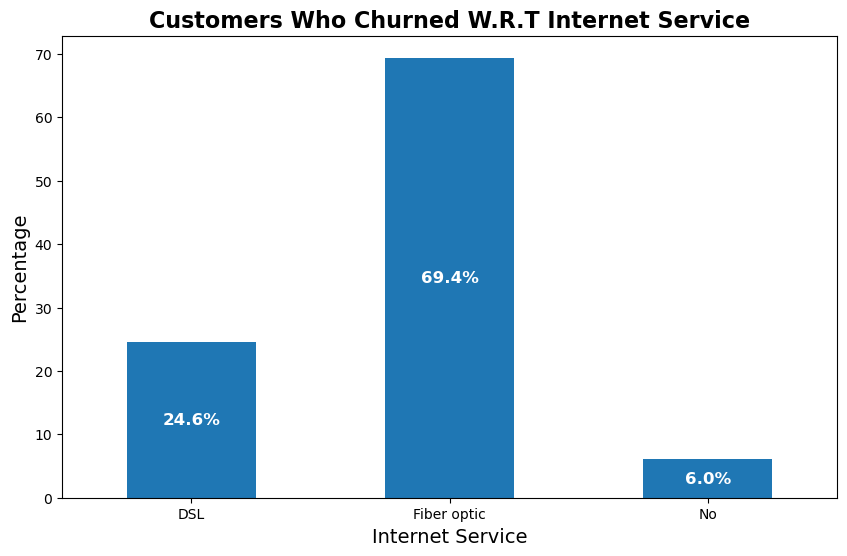

In [69]:
plt.figure(figsize = (10, 6))
plot = internet_group.plot(kind = 'bar')


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 12, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Internet Service', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Customers Who Churned W.R.T Internet Service', size = 16, weight = 'bold')
plt.show();

Customers having internet service as Fiber Optic churn the most, while customers having no internet service churn the least!

In [70]:
# we can analyze it much deeper by seeing individual percentages of customers who churned and those who didn't

internet_group1 = data1.groupby(['Churn', 'InternetService']).size().unstack()
internet_group1

InternetService,DSL,Fiber optic,No
Churn,,,
0,1957,1799,1407
1,459,1297,113


In [71]:
# converting into percentages

internet_group1 = internet_group1 / internet_group1.sum() * 100
internet_group1

InternetService,DSL,Fiber optic,No
Churn,,,
0,81.001656,58.107235,92.565789
1,18.998344,41.892765,7.434211


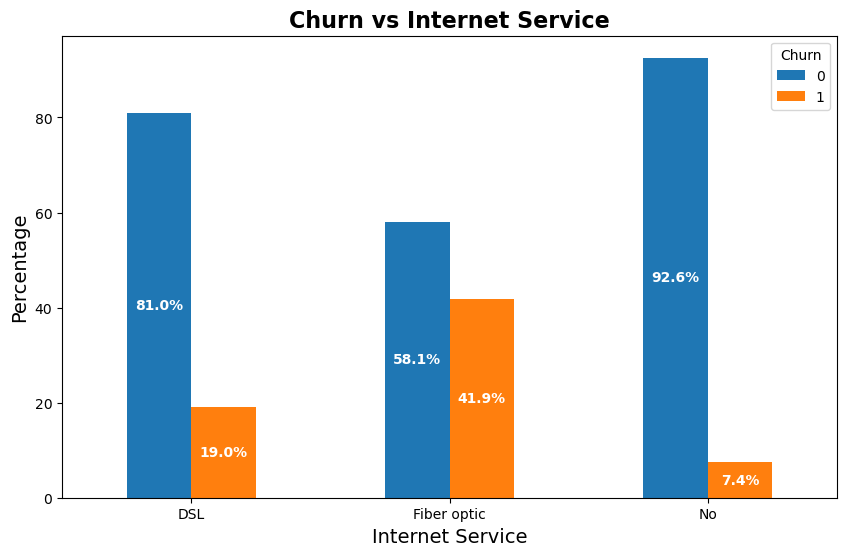

In [72]:
plot = internet_group1.T.plot(kind = 'bar', figsize = (10, 6))


for p in plot.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = (p.get_x() + p.get_width() / 2) 
    y = p.get_y() + p.get_height() / 2
    plot.annotate(percentage, (x, y), size = 10, color = 'white', weight = 'bold', va = 'center', ha = 'center')
    
plt.xticks(rotation = 0)
plt.xlabel('Internet Service', size = 14)
plt.ylabel('Percentage', size = 14)
plt.title('Churn vs Internet Service', size = 16, weight = 'bold')
plt.show();

#### 4.1.6 Churn rate vs monthly charges.

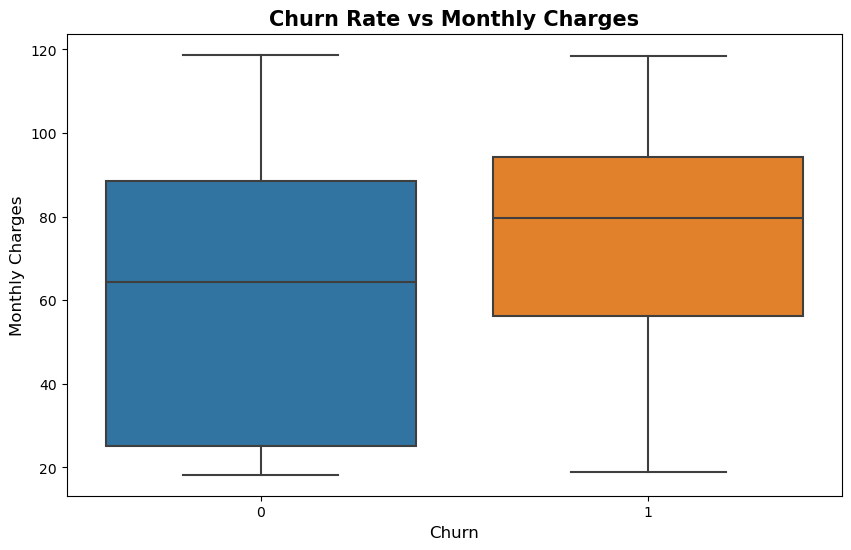

In [73]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'Churn', y = 'MonthlyCharges', data = data1)

plt.title('Churn Rate vs Monthly Charges', size = 15, weight = 'bold')
plt.xlabel('Churn', size = 12)
plt.ylabel('Monthly Charges', size = 12)

plt.show();

The plot can be easily interpretated as; customers having higher monthly charges than the rest churn more. And we saw this on the correlation plot too, that churn and monthly charges are positively related. Now lets look at total charges.

In [74]:
churn0 = data1[data1.Churn == 0]
churn1 = data1[data1.Churn == 1]

month_dist0 = ed.Cdf.from_seq(churn0.MonthlyCharges)
month_dist1 = ed.Cdf.from_seq(churn1.MonthlyCharges)

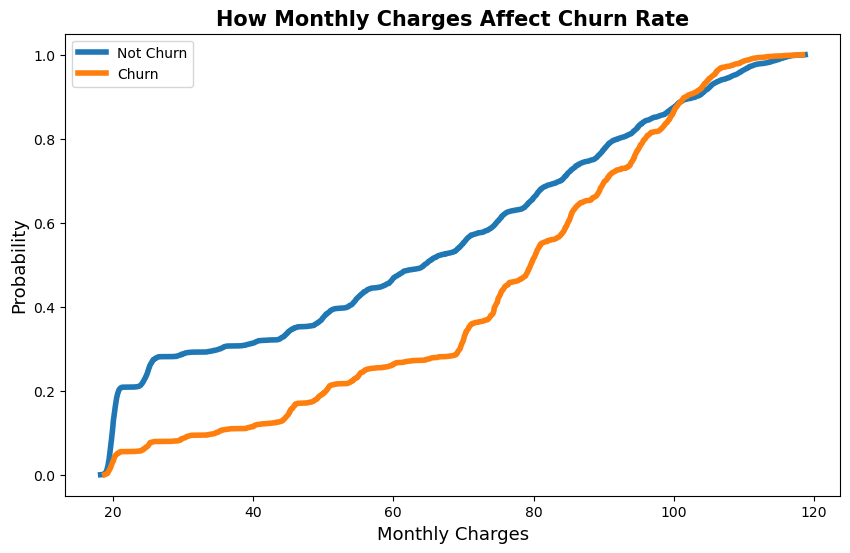

In [75]:
plt.figure(figsize = (10, 6))

month_dist0.plot(lw = 4, label = 'Not Churn')
month_dist1.plot(lw = 4, label = 'Churn')

plt.xlabel('Monthly Charges', size = 13)
plt.ylabel('Probability', size = 13)
plt.title('How Monthly Charges Affect Churn Rate', size = 15, weight = 'bold')

plt.legend()
plt.show();

Here is another visualization of the same relation, the graph shows that as monthly charges increases, the probability of customers to churn is greater!

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


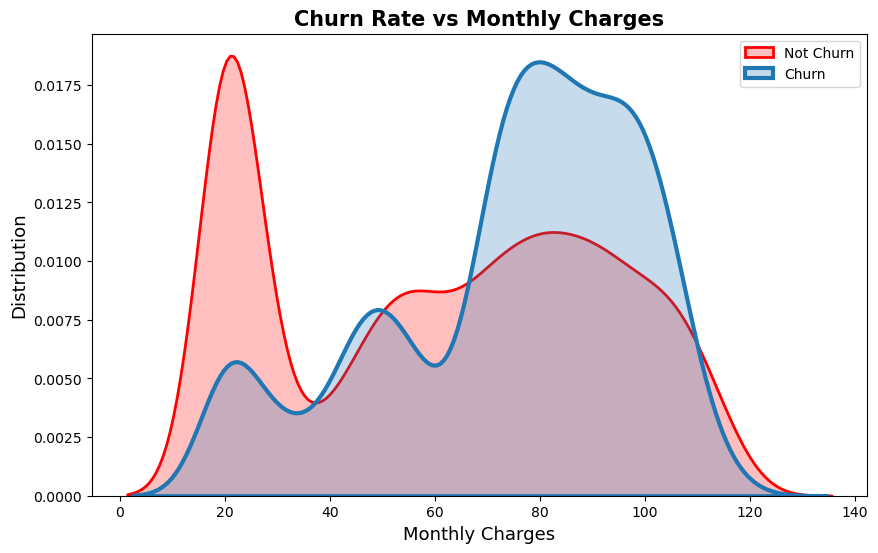

In [76]:
plt.figure(figsize = (10, 6))

sns.kdeplot(churn0.MonthlyCharges, fill = True, label = 'Not Churn', color = 'red', lw = 2)
sns.kdeplot(churn1.MonthlyCharges, fill = True, label = 'Churn', lw = 3)

plt.xlabel('Monthly Charges', size = 13)
plt.ylabel('Distribution', size = 13)
plt.title('Churn Rate vs Monthly Charges', size = 15, weight = 'bold')

plt.legend()
plt.show();

Customers with high monthly charges tend to churn more. Another visualization of the same statement!

#### 4.1.7 Churn rate vs total charges.

In [77]:
churn0 = data1[data1.Churn == 0]
churn1 = data1[data1.Churn == 1]

total_dist0 = ed.Cdf.from_seq(churn0.TotalCharges)
total_dist1 = ed.Cdf.from_seq(churn1.TotalCharges)

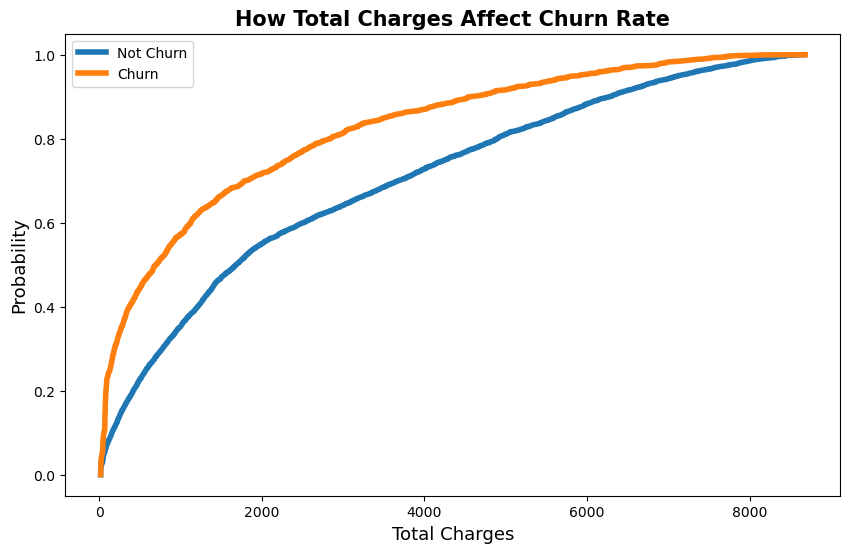

In [78]:
plt.figure(figsize = (10, 6))

total_dist0.plot(lw = 4, label = 'Not Churn')
total_dist1.plot(lw = 4, label = 'Churn')

plt.xlabel('Total Charges', size = 13)
plt.ylabel('Probability', size = 13)
plt.title('How Total Charges Affect Churn Rate', size = 15, weight = 'bold')

plt.legend()
plt.show();

It looks like that the probability for a customer to not churn is very less compared to the probability a customer who churns with the increase in total charges. In other words, customers churn more when total charges are low, which is quite evident from this graph

C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\PMLS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


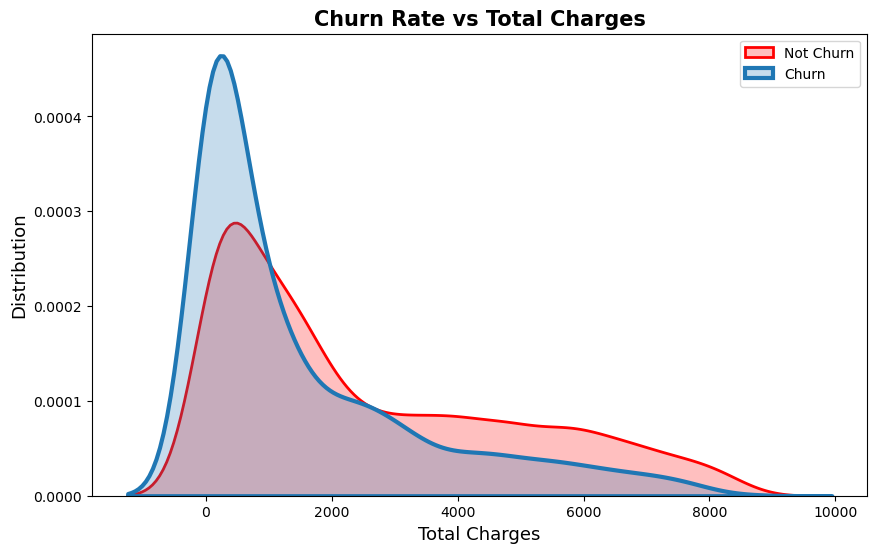

In [79]:
plt.figure(figsize = (10, 6))

sns.kdeplot(churn0.TotalCharges, fill = True, label = 'Not Churn', color = 'red', lw = 2)
sns.kdeplot(churn1.TotalCharges, fill = True, label = 'Churn', lw = 3)

plt.xlabel('Total Charges', size = 13)
plt.ylabel('Distribution', size = 13)
plt.title('Churn Rate vs Total Charges', size = 15, weight = 'bold')

plt.legend()
plt.show();

Yet again, customers churn more when total charges are less. 

#### 4.1.8 Features I will be using for models.

1. Contract
2. Tenure
3. Senior Citizen
4. Internet Service
5. Monthly Charges
6. Total Charges
7. Online Security
8. Tech Support
9. Device Protection
10. Paperless Billings

### 4.2 Model Development

#### 4.2.1 Getting relevant features, importing libraries.

- I will be working on a Logistic Regression binary classification model.
- I will make the model as they are for now, then I will develop a confusion matrix, which I will explain later.
- Lastly, I will try to tune the model further by tuning its hyperparameters.

In [80]:
feature_list = ['Contract', 'tenure', 'SeniorCitizen', 'InternetService','MonthlyCharges', 'TotalCharges', 'OnlineSecurity',\
                'TechSupport', 'DeviceProtection', 'PaperlessBilling', 'Churn']

data2 = data.copy()
data2 = data2[feature_list]

In [81]:
data2.columns

Index(['Contract', 'tenure', 'SeniorCitizen', 'InternetService',
       'MonthlyCharges', 'TotalCharges', 'OnlineSecurity', 'TechSupport',
       'DeviceProtection', 'PaperlessBilling', 'Churn'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [83]:
data2.head()

,Contract,tenure,SeniorCitizen,InternetService,MonthlyCharges,TotalCharges,OnlineSecurity,TechSupport,DeviceProtection,PaperlessBilling,Churn
0,Month-to-month,1,0,DSL,29.85,29.85,No,No,No,Yes,No
1,One year,34,0,DSL,56.95,1889.50,Yes,No,Yes,No,No
2,Month-to-month,2,0,DSL,53.85,108.15,Yes,No,No,Yes,Yes
3,One year,45,0,DSL,42.30,1840.75,Yes,Yes,Yes,No,No
4,Month-to-month,2,0,Fiber optic,70.70,151.65,No,No,No,Yes,Yes


#### 4.2.2 Separating features and target variable.
- Also converting categorical values into numerical.
- Scaling larger values.

In [84]:
X = data2.drop('Churn', axis = 1)
y = data2['Churn'].values

In [85]:
dummies = pd.get_dummies(X)
dummies

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,1,0,29.85,29.85,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
1,34,0,56.95,1889.50,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False
2,2,0,53.85,108.15,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True
3,45,0,42.30,1840.75,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False
4,2,0,70.70,151.65,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True,False,True
7039,72,0,103.20,7362.90,False,True,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True
7040,11,0,29.60,346.45,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,True
7041,4,1,74.40,306.60,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True


In [86]:
X = dummies.values

In [87]:
X

array([[1, 0, 29.85, ..., False, False, True],
       [34, 0, 56.95, ..., True, True, False],
       [2, 0, 53.85, ..., False, False, True],
       ...,
       [11, 0, 29.6, ..., False, False, True],
       [4, 1, 74.4, ..., False, False, True],
       [66, 0, 105.65, ..., True, False, True]], dtype=object)

In [88]:
LE = LabelEncoder()
y = LE.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 0])

#### 4.2.3 Splitting the data into train and test.
- Performing scaling on each set separately.

In [89]:
scaler = MinMaxScaler(feature_range = (0, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_test_scaled = scaler.fit_transform(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('X_train', scaler, [0,2,3])], remainder ='passthrough')

X1_train_scaled = ct.fit_transform(X_train)
X1_test_scaled = ct.transform(X_test)

In [91]:
X_train_scaled.shape

(5625, 21)

In [92]:
X1_train_scaled.shape

(5625, 21)

#### 4.2.4 Creating the model and predicting.

In [93]:
model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [94]:
y_pred = model.predict(X_test_scaled)

In [95]:
model.score(X_test_scaled, y_test)

0.8095238095238095

#### 4.2.5 Confusion matrix.
- As I mentioned before when exploring data, there is class imbalance in our dataset, i.e., one class occurs more frequently than the other, so in cases like this, a confusion matrix helps analyze the model results.
- We can see different metrics such as precision, accuracy, and others.

In [96]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[934, 112],
       [156, 205]], dtype=int64)

In [97]:
cm_percent = confusion_matrix(y_test, y_pred)
cm_percent = cm_percent.astype('float') / cm_percent.sum(axis=1)[:, np.newaxis]
cm_percent

array([[0.89292543, 0.10707457],
       [0.43213296, 0.56786704]])

##### Visualizing Confusion Matrix

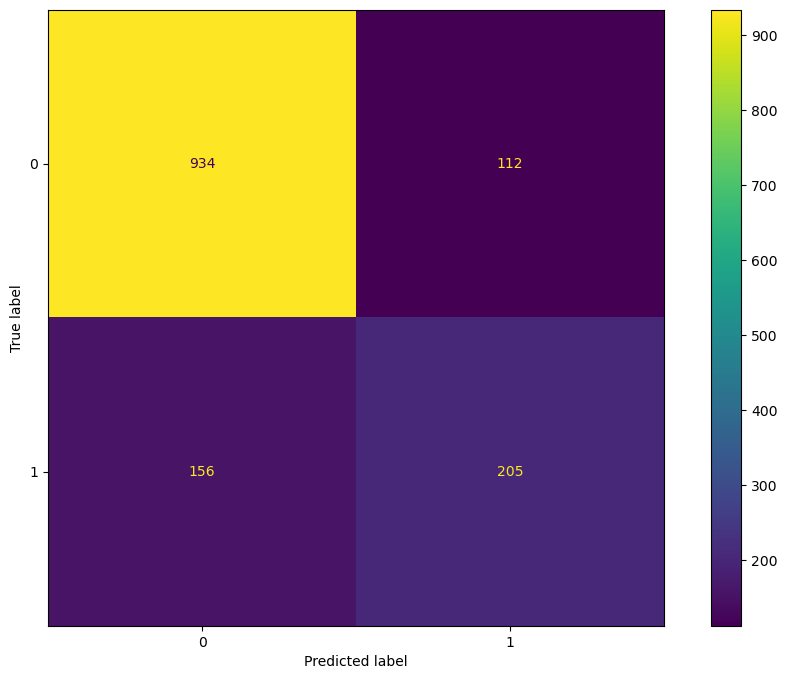

In [98]:
fig1 = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
fig, ax = plt.subplots(figsize=(12 ,8))
fig1.plot(ax = ax);

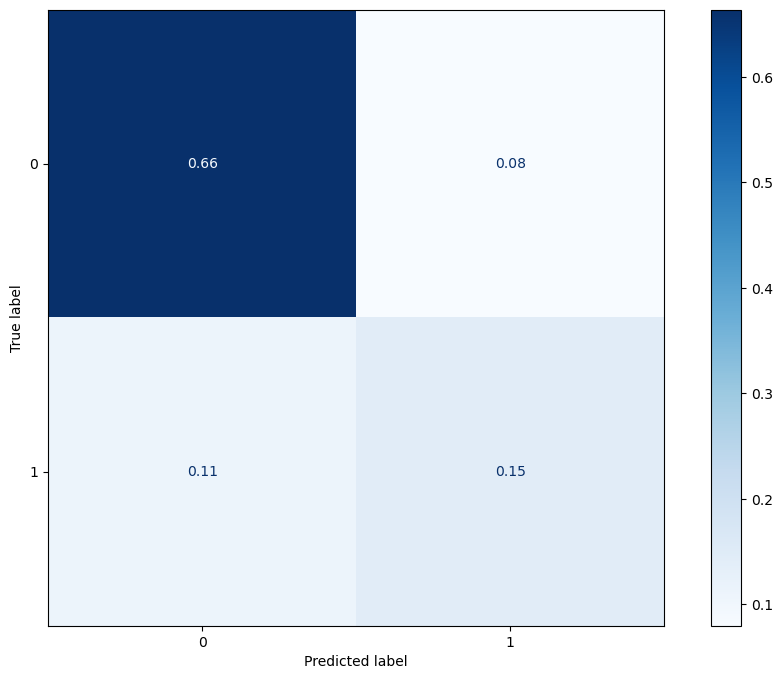

In [99]:
# Normalized By The Total Number of Samples
fig, ax = plt.subplots(figsize=(12 ,8))
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'all', cmap = plt.cm.Blues, ax = ax)

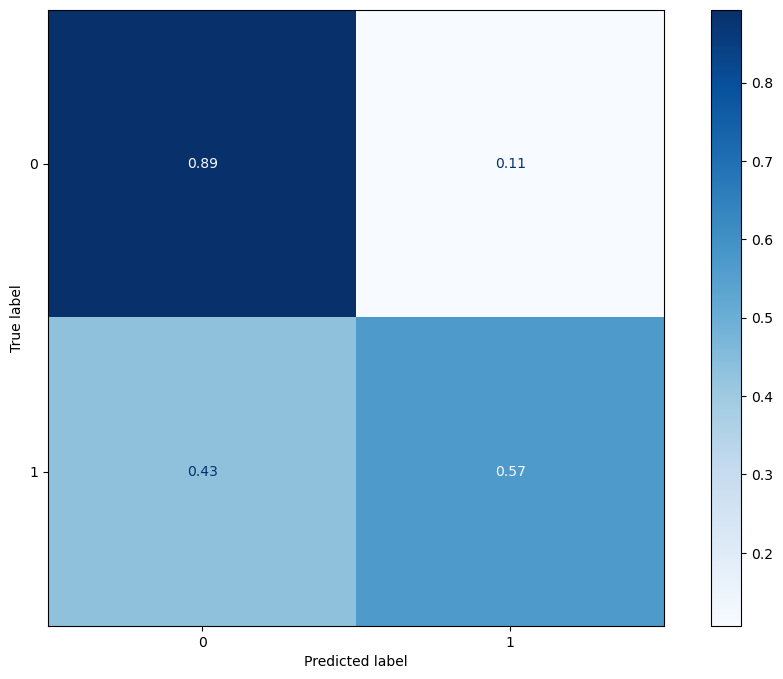

In [100]:
# Normalized Over The True Conditions
fig, ax = plt.subplots(figsize=(12 ,8))
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'true', cmap = plt.cm.Blues, ax = ax)

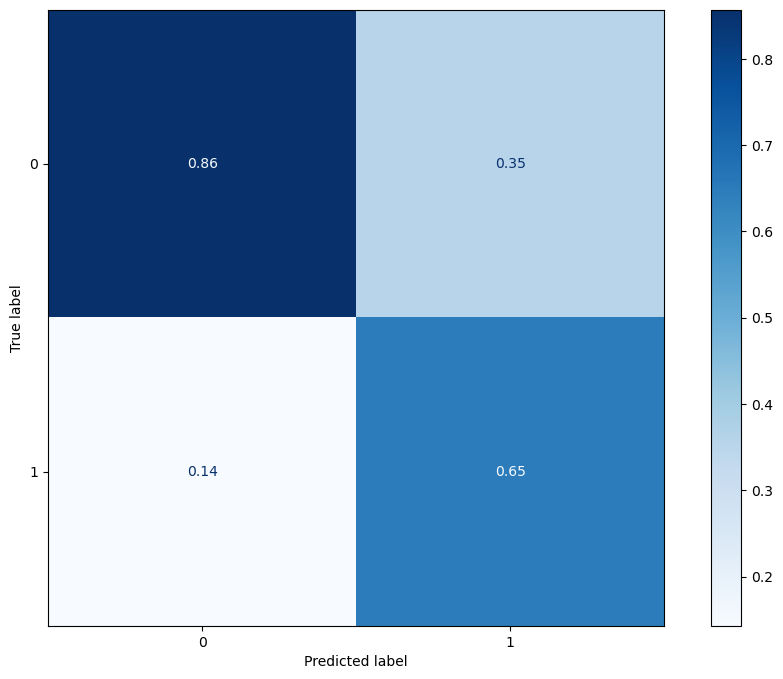

In [101]:
# Normalized Over The Predicted Conditions
fig, ax = plt.subplots(figsize=(12 ,8))
fig = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize = 'pred', cmap = plt.cm.Blues, ax = ax)

#### 4.2.6 Comparison using different metrics.

In [102]:
report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1046
           1       0.65      0.57      0.60       361

    accuracy                           0.81      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.81      0.81      1407



## 5. Observations and Final Conclusion

* Accuracy:
    - The accuracy of the Logistic Regression model on the churn data came out to be approximately 81%.
<br><br>
* Precision:
    - It is the percentage of correct positive (1) predictions relative to total positive predictions.
    - An ability of the model not to label a negative label as positive.
    - Formula: TP / (TP + FP)
    - Out of all the customers the model predicted, 65% of them churned.
<br><br>
* Recall:
    - It is the percentage of correct positive predictions relative to total actual positives.
    - The ability of the model to find all the positive samples.
    - Formula: TP / (TP + FN)
    - Out of all the customers that churned, the model predicted 57% of them correctly.
<br><br>
* F1-Score:
    - It is a harmonic mean between the precision and the recall.
    - It gives equal weightage to both.
    - The closer the value to 1, the better the model performed.
    - The model did a moderate (average) job of predicting whether or not customers will churn (0.60 == 60%)
<br><br>
* Support:
    - It shows the number of samples for each class.